In [26]:
include("hough.jl")
include("test.jl")
include("data.jl")

convertDataToImgArray (generic function with 1 method)

size(data) = (2890, 2)
numSteps = [10000.0 10000.0]


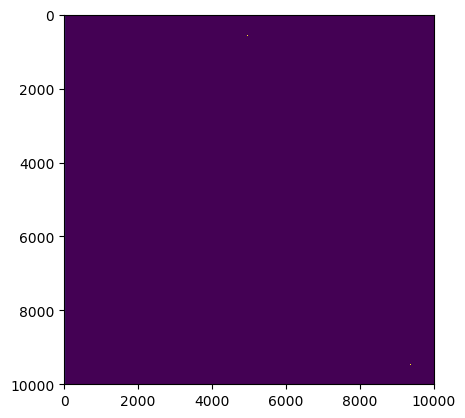

size(img) = (9999, 9999)


2864

In [51]:
data = readData("A")';
data[:,1] .= data[:,1]/178;
data[:,2] .= data[:,2]/9.393e-6;
@show size(data);
plot(data[:,1],data[:,2]);
img, offset, deltas = convertDataToImgArray(data)
@show size(img)
imshow(img)
length(find(img))

In [37]:
theta,rho,houghSpace=hough(img, 1/200)

(0.0:0.005:3.14, -14140.721410168577:1.0:14140.278589831423, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

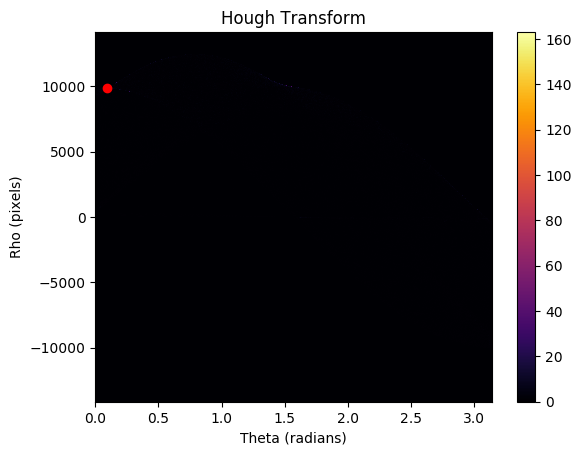

(idx, idy) = (23987, 20)


PyObject <matplotlib.collections.PathCollection object at 0x7f8b9e777828>

In [38]:
best = indmax(houghSpace)
idx, idy = ind2sub(houghSpace, best)
@show idx,idy
figure(3)
pcolormesh(Array(theta),Array(rho),Array(houghSpace), shading="flat", cmap="inferno");
title("Hough Transform");
xlabel("Theta (radians)");
ylabel("Rho (pixels)");
colorbar()
scatter(theta[idy], rho[idx], color="red")

In [41]:
@show theta[idy], rho[idx]
g(x,p,theta) = (p/sin(theta)-x*cot(theta))
@show rho[idx[1]]/sin(theta[idy[1]]), cot(theta[idy[1]])

(theta[idy], rho[idx]) = (0.095, 9845.278589831423)
(rho[idx[1]] / sin(theta[idy[1]]), cot(theta[idy[1]])) = (103790.55933833451, 10.494630053638131)


(103790.55933833451, 10.494630053638131)

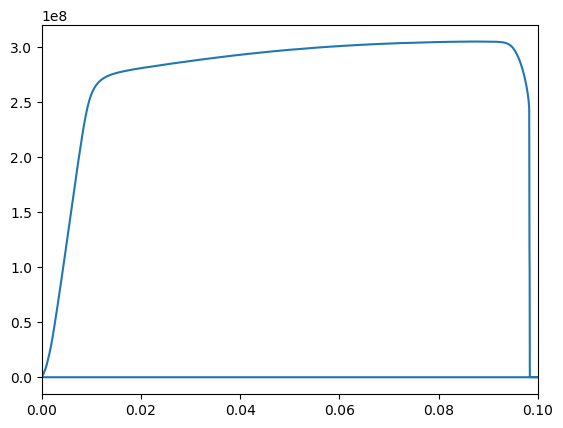

(0.0, 0.1)

In [47]:
figure(5)
range = linspace(0,0.1,200)
plot(data[:,1],data[:,2]);
plot(range*deltas[1],g.(range,rho[idx[1]], theta[idy[1]])*deltas[2])
xlim([0,0.10])

In [50]:
using SymPy
@syms x
g(x, rho[23987], theta[20])

-10.4946300536381⋅x + 103790.559338335